In [ ]:
import numpy as np
import pandas as pd
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
povpred = pd.read_csv("povdata_clean.csv", header=0)
povpred.columns

Index(['country', 'is_urban', 'age', 'female', 'married', 'religion',
       'relationship_to_hh_head', 'education_level', 'literate', 'can_add',
       'can_divide', 'employed_last_year', 'employment_category_last_year',
       'employment_type_last_year', 'income_own_business_last_year',
       'income_private_sector_last_year', 'income_public_sector_last_year',
       'num_times_borrowed_last_year', 'formal_savings', 'informal_savings',
       'has_insurance', 'has_investment', 'borrowed_for_emergency_last_year',
       'borrowed_for_daily_expenses_last_year',
       'borrowed_for_home_or_biz_last_year', 'can_call_viaphone',
       'can_text_viaphone', 'can_use_internet_viaphone', 'active_bank_user',
       'poverty_probability', 'Poor'],
      dtype='object')

In [ ]:
povpred.shape

(12600, 31)

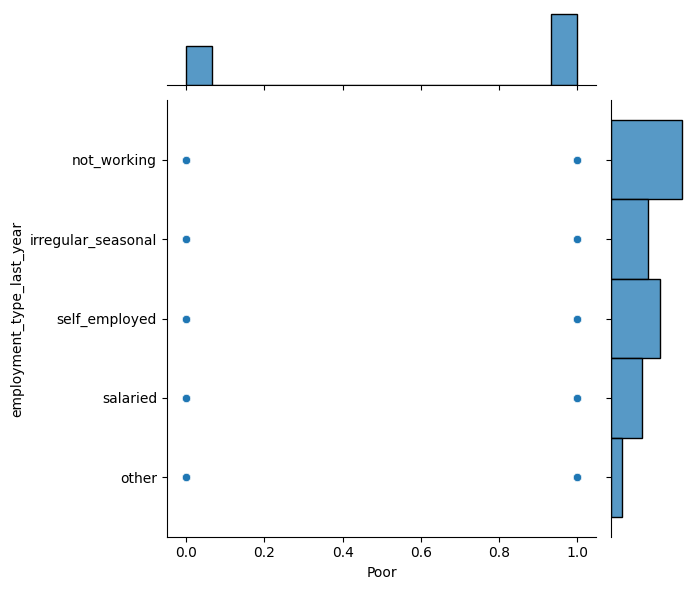

In [ ]:
sns.jointplot(x='Poor', y='employment_type_last_year', data=povpred)

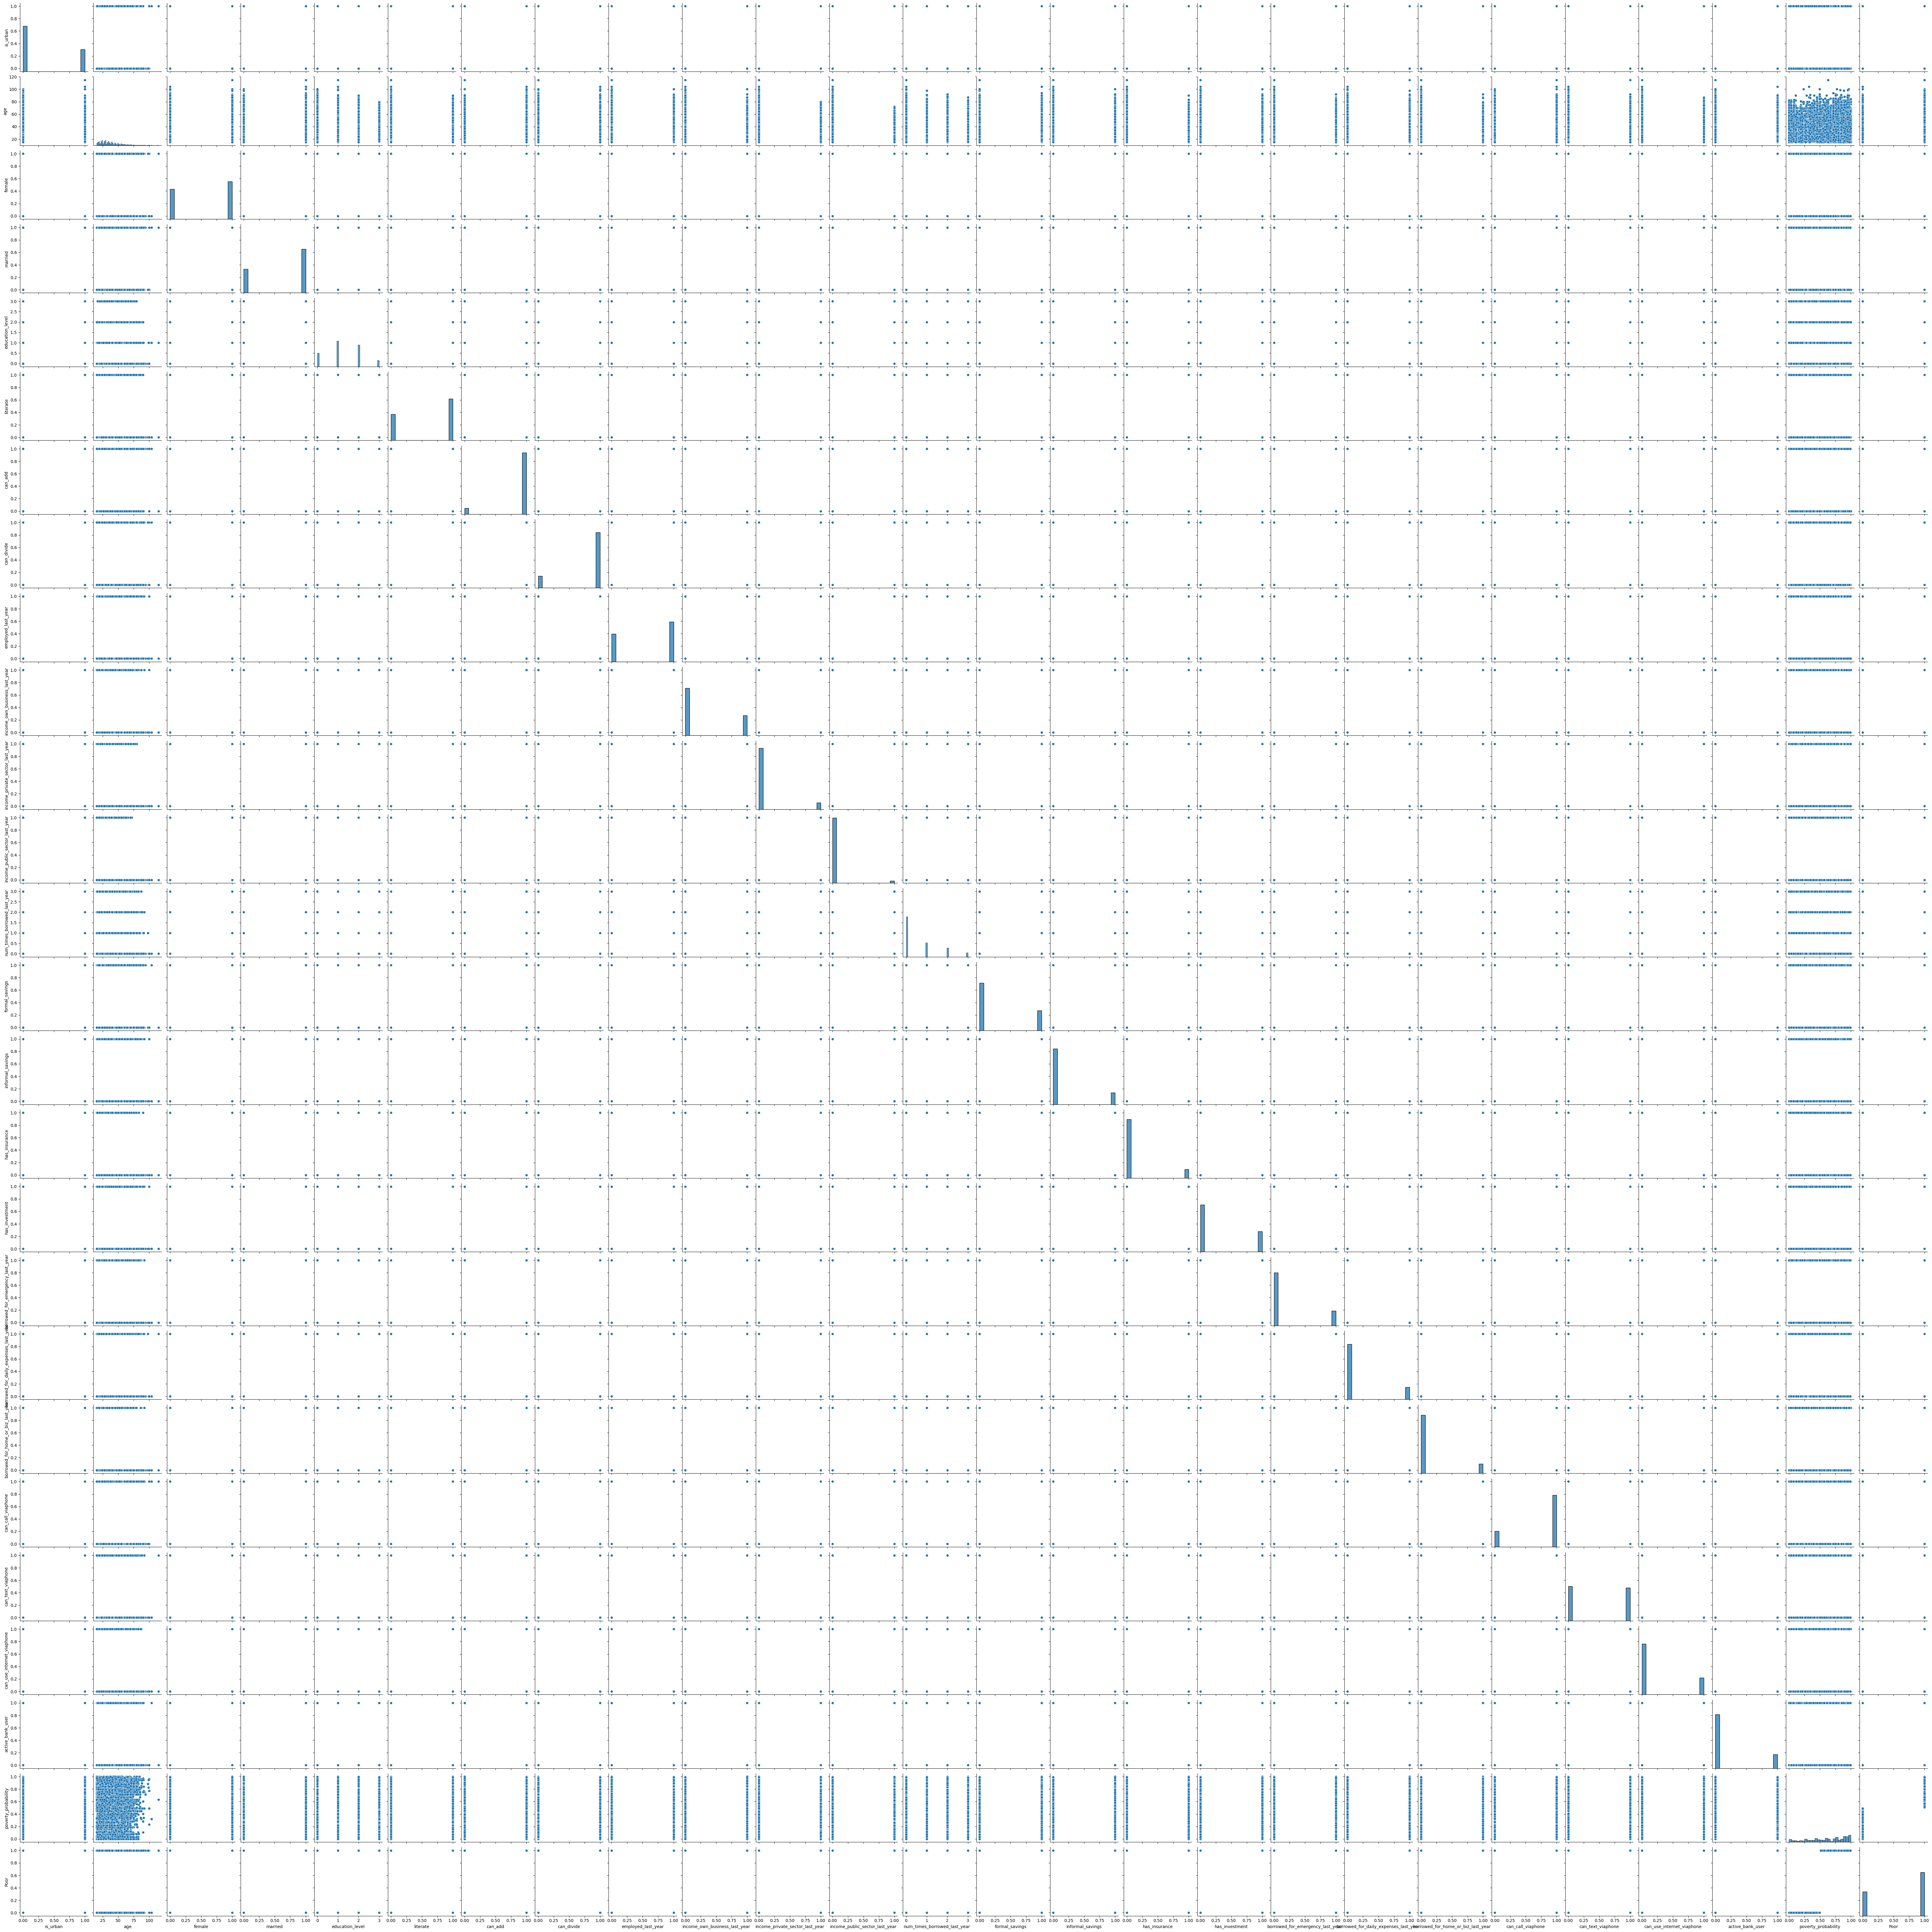

In [ ]:
sns.pairplot(povpred)

In [ ]:
povpred["education_level"].value_counts()

# education level: 0, 1, 2, and 3

1.0    4786
2.0    4083
0.0    2545
3.0    1186
Name: education_level, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

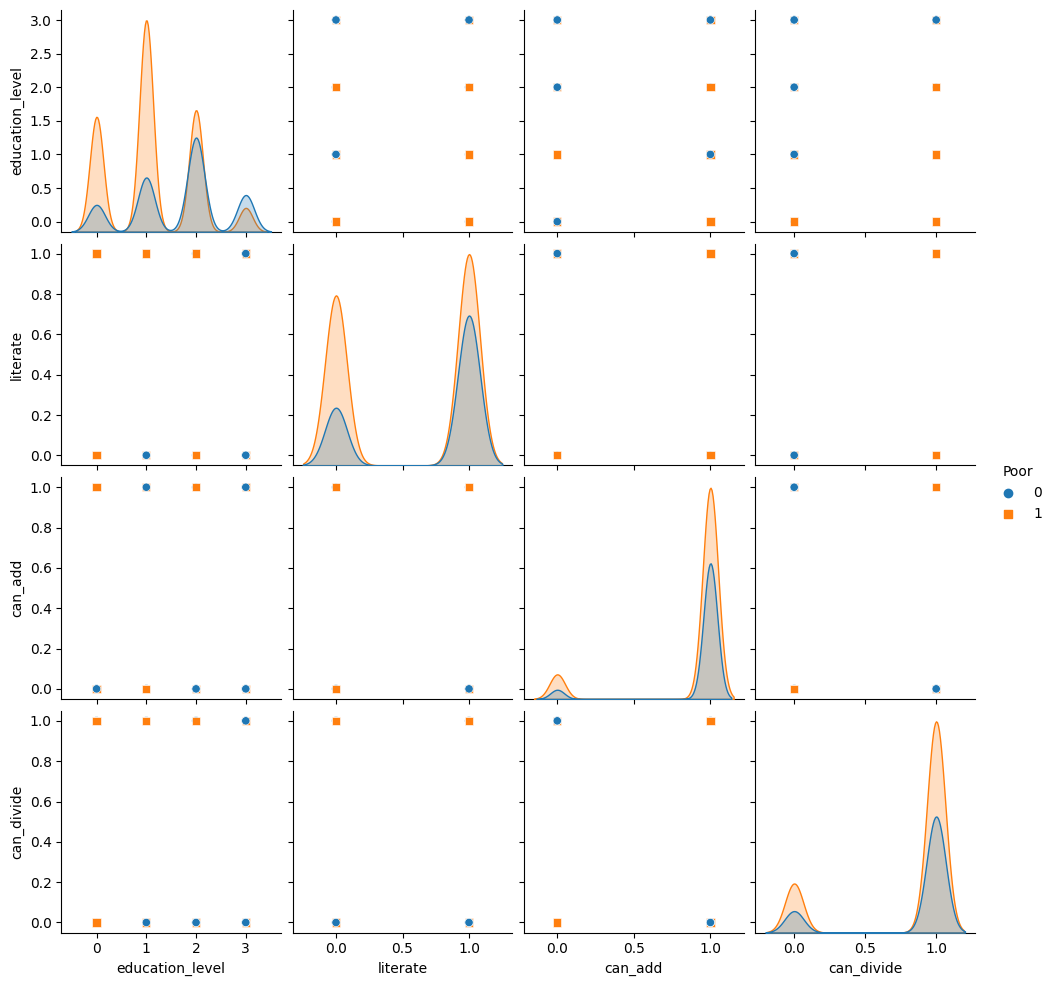

In [ ]:
plt.figure
sns.pairplot(povpred, vars=['education_level', 'literate', 'can_add', 'can_divide'], hue='Poor', markers=["o", "s"])
plt.show

# if 0_Poor

In [ ]:
povpred["formal_savings"].value_counts()

0    8872
1    3728
Name: formal_savings, dtype: int64

In [ ]:
povpred["informal_savings"].value_counts()

0    10396
1     2204
Name: informal_savings, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

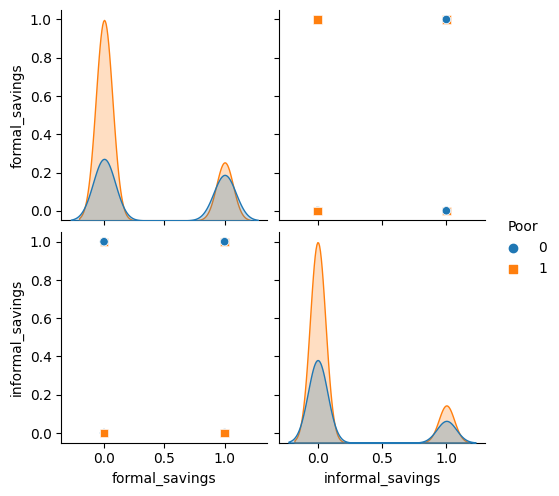

In [ ]:
plt.figure
sns.pairplot(povpred, vars=['formal_savings', 'informal_savings', ], hue='Poor', markers=["o", "s"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

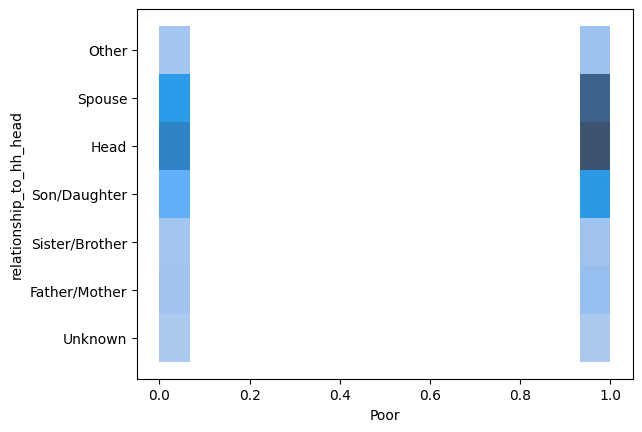

In [ ]:
plt.figure
sns.histplot(povpred, x='Poor', y='relationship_to_hh_head')
plt.show

In [ ]:
X = povpred[['income_own_business_last_year', 'income_private_sector_last_year', 'income_public_sector_last_year', 'num_times_borrowed_last_year', 'formal_savings', 'informal_savings', 'has_insurance', 'has_investment', 'borrowed_for_emergency_last_year', 'borrowed_for_daily_expenses_last_year', 'borrowed_for_home_or_biz_last_year', 'active_bank_user']]
y = povpred['Poor']

In [ ]:
dummies = ['employment_type_last_year', 'employment_category_last_year']
dummy_data = pd.get_dummies(povpred[dummies])

In [ ]:
dummies_2 = ['relationship_to_hh_head']
dummy_data_2 = pd.get_dummies(povpred[dummies_2])

In [ ]:
dummies_3 = ['religion']
dummy_data_3 = pd.get_dummies(povpred[dummies_3])

In [ ]:
dummies_4 = ['country']
dummy_data_4 = pd.get_dummies(povpred[dummies_4])

In [ ]:
povpred_2 = pd.concat([povpred, dummy_data, dummy_data_2, dummy_data_3, dummy_data_4], axis = 1)

In [ ]:
povpred_2

,country,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,literate,can_add,...,religion_P,religion_Q,religion_X,country_A,country_C,country_D,country_F,country_G,country_I,country_J
0,C,0,18,1,1,P,Other,1.0,1,1,...,1,0,0,0,1,0,0,0,0,0
1,C,1,30,1,1,P,Other,1.0,1,1,...,1,0,0,0,1,0,0,0,0,0
2,A,0,20,1,1,Q,Spouse,1.0,1,1,...,0,1,0,1,0,0,0,0,0,0
3,A,0,61,0,1,Q,Head,0.0,0,1,...,0,1,0,1,0,0,0,0,0,0
4,D,0,26,1,1,X,Spouse,1.0,1,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595,C,1,50,0,1,P,Head,1.0,1,1,...,1,0,0,0,1,0,0,0,0,0
12596,D,0,90,0,0,O,Head,0.0,1,1,...,0,0,0,0,0,1,0,0,0,0
12597,J,0,52,1,0,X,Head,1.0,0,1,...,0,0,1,0,0,0,0,0,0,1
12598,I,0,40,0,1,Q,Head,0.0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
povpred_2.shape

(12600, 60)

In [ ]:
povpred_hhremoved = povpred_2.drop('relationship_to_hh_head', axis=1)

In [ ]:
povpred_3 = povpred_hhremoved.drop('employment_category_last_year', axis=1)

In [ ]:
povpred_4 = povpred_3.drop('employment_type_last_year', axis=1)

In [ ]:
povpred_4 = povpred_3.drop('employment_type_last_year', axis=1)

In [ ]:
povpred_5 = povpred_4.drop('religion', axis=1)

In [ ]:
povpred_6 = povpred_5.drop('country', axis=1)

In [ ]:
X = povpred_6.drop('Poor', axis=1)
y = povpred_6['Poor']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 0, 0, ..., 1, 1, 0])